In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load drive contents
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/life_expectancy_data.csv')

# Clean empty rows
df.dropna(inplace=True)
empty_rows_count = len(df[df.isnull().any(axis=1)])

print("Empty rows count:", empty_rows_count)

df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Empty rows count: 0


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Drop the unnecessary columns
# Country, Year, Status, Adult Mortality, percentage expenditure
columns_to_remove = [0,1,2,4,7]
df.drop(df.columns[columns_to_remove], axis=1, inplace=True)

In [ ]:
print(len(df.columns))
df.shape[0]
df.head()

17


,Life expectancy,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,62,0.01,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,64,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,66,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,69,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,71,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<Axes: >

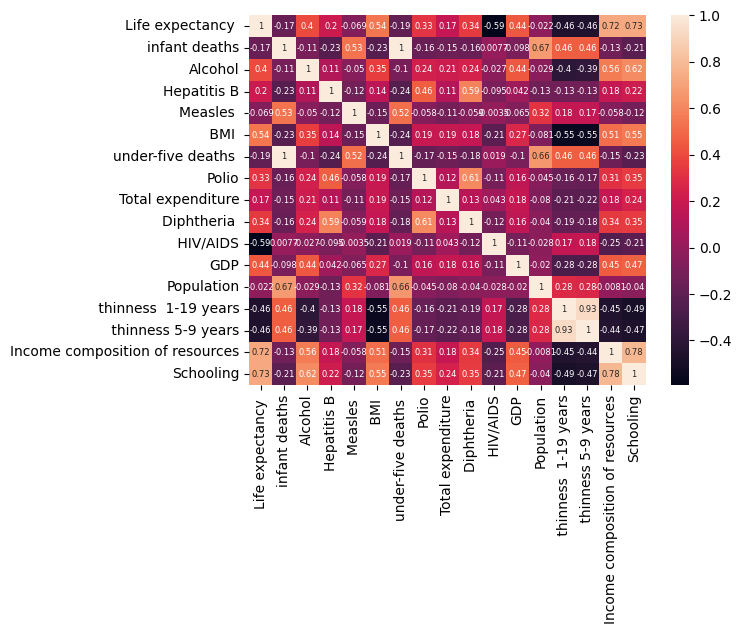

In [ ]:
import seaborn as sns

# Heatmap of correlation
correlation=df.corr()
plt.figure()
sns.heatmap(correlation, annot=True, annot_kws={"fontsize": 6})

In [ ]:
# Shuffle the data
df = df.sample(frac=1).reset_index(drop=True)
df.shape

(1649, 17)

In [ ]:
from sklearn.model_selection import train_test_split

# Split into train, test
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
from pandas._libs.tslibs.timestamps import Timestamp
# Input / output columns

X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]

X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

print("Input train features shape:", X_train.shape)
print("Output train variable shape:", y_train.shape)

print("Input test features shape:", X_test.shape)
print("Output test variable shape:", y_test.shape)

Input train features shape: (1319, 16)
Output train variable shape: (1319,)
Input test features shape: (330, 16)
Output test variable shape: (330,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling (fit only on training)
# Create an instance of the scaler
scaler = StandardScaler()

# Scale the DataFrame
'''
The fit_transform method calculates the mean and standard deviation of each feature in the training data and scales the features accordingly.
The transform method uses the previously calculated mean and standard deviation from the training data to scale the test data.
'''
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVR #Support Vector Regression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

'''
SVR, like SVM, does not involve explicit layers of neurons, so it does not have a specific number of layers of neurons.
In SVM-based algorithms such as SVR, the training process involves finding a hyperplane that maximally separates the data points.
The hyperplane is constructed using a subset of training samples called support vectors.
These support vectors play a crucial role in defining the decision function of the SVR model.
'''

# Define the SVR model
svr = SVR(kernel='rbf', epsilon=0.1, verbose=True)

# Define the parameter grid for C
# Upon repeated testing, the optimal interval for C searching is between 40 and 75
param_grid = {'C': [40, 45, 50, 55, 60, 65, 70, 75]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best value for C
best_C = grid_search.best_params_['C']
print("\nBest value for C:", best_C)


'''
C, the regularization parameter:
A smaller C value allows for a larger margin around the regression line and allows more training errors (higher bias, lower variance).
On the other hand, a larger C value leads to a smaller margin and a stricter fit to the training data (lower bias, higher variance).
'''

# Fit the SVR model with the best C value
svr_best = SVR(kernel='rbf', C=best_C, epsilon=0.1)
svr_best.fit(X_train_scaled, y_train)

# Predict using the best model
y_train_pred = svr_best.predict(X_train_scaled)
y_test_pred = svr_best.predict(X_test_scaled)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
Best value for C: 70


In [ ]:
'''
R-squared (r2_train):
R-squared is a statistical measure that represents the proportion of the variance in the target variable that can be explained by the regression model.
It ranges from 0 to 1, where 1 indicates a perfect fit of the model to the data.
A higher R-squared value suggests that the model is able to capture more of the variation in the target variable.

Mean Squared Error (mse_train):
Mean Squared Error calculates the average squared difference between the predicted values and the actual values.
It measures the average squared distance between the predicted and actual values, giving higher weight to larger errors.
Lower values of MSE indicate better model performance.

Root Mean Squared Error (rmse_train): Root Mean Squared Error is the square root of the mean squared error.
It is a commonly used metric in regression tasks as it provides a measure of the average absolute error between the predicted and actual values.
RMSE is in the same unit as the target variable and gives a more interpretable error value compared to MSE.

Mean Absolute Error (mae_train):
Mean Absolute Error calculates the average absolute difference between the predicted values and the actual values.
It measures the average absolute distance between the predicted and actual values, giving equal weight to all errors.
Similar to MSE and RMSE, lower values of MAE indicate better model performance.
'''

# Evaluate performance metrics on training data
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Evaluate performance metrics on test data
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print performance metrics
print("Training Set:")
print("R-squared percentage:", round(r2_train * 100 , 3), "%")
print("Mean Squared Error:", round(mse_train , 3), "(lower = better)")
print("Root Mean Squared Error:", round(rmse_train , 3), "(lower = better)")
print("Mean Absolute Error:", round(mae_train , 3), "(lower = better)")

print("\nTest Set:")
print("R-squared percentage:", round(r2_test * 100 , 3), "%")
print("Mean Squared Error:", round(mse_test , 3), "(lower = better)")
print("Root Mean Squared Error:", round(rmse_test , 3), "(lower = better)")
print("Mean Absolute Error:", round(mae_test , 3), "(lower = better)")

Training Set:
R-squared percentage: 96.217 %
Mean Squared Error: 3.063 (lower = better)
Root Mean Squared Error: 1.75 (lower = better)
Mean Absolute Error: 0.983 (lower = better)

Test Set:
R-squared percentage: 91.084 %
Mean Squared Error: 5.543 (lower = better)
Root Mean Squared Error: 2.354 (lower = better)
Mean Absolute Error: 1.602 (lower = better)


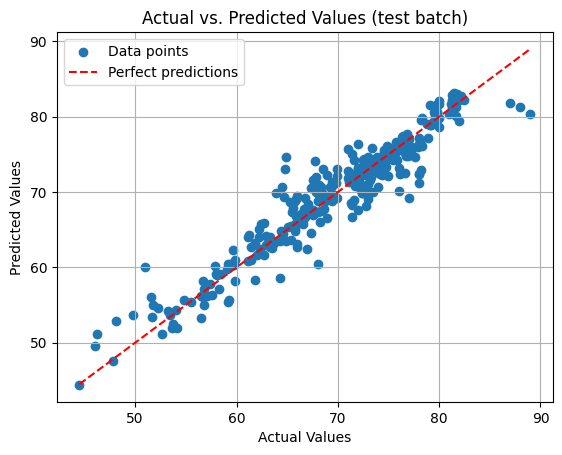

In [ ]:
import matplotlib.pyplot as plt

# Generate a line for perfect predictions
x_line = np.linspace(min(y_test), max(y_test), 100)
y_line = x_line

# Plot the scatter plot
plt.scatter(y_test, y_test_pred, label='Data points')

# Plot the line for perfect predictions
plt.plot(x_line, y_line, color='red', linestyle='--', label='Perfect predictions')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (test batch)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Test accuracy using Romanian values
df_new = pd.read_csv('/content/drive/MyDrive/life_expectancy_data.csv')
df_new.dropna(inplace=True)

# Drop the unnecessary columns
columns_to_remove_new = [1,2,4,7]
df_new.drop(df_new.columns[columns_to_remove_new], axis=1, inplace=True)

row_values = [df_new.loc[df_new.iloc[:, 0] == 'Romania'].iloc[0, 2:].values]

# Standardize the input data
row_values_scaled = scaler.fit_transform(row_values)

# Make predictions
predicted_output = svr_best.predict(row_values_scaled)
filtered_df= df_new[df_new.iloc[:, 0] == 'Romania']

# Retrieve the value from the second column
value = filtered_df.at[filtered_df.index[0], filtered_df.columns[1]]
print("Predicted output (life expectancy in Romania): ", np.round(predicted_output[0]), ", while the true value is: ", np.round(value), sep='')

# Calculate accuracy
def calculate_x(y, z):
    x = (y * 100) / z

    if x > 100:
        x = 100 - (x - 100)

    return x

print("Therefore, the accuracy was: ", np.round(calculate_x(predicted_output[0], value), 2), "%", sep='')


Predicted output (life expectancy in Romania): 66.0, while the true value is: 75.0
Therefore, the accuracy was: 87.93%
